<a href="https://colab.research.google.com/github/namari1/Google-Colab-Projects/blob/main/Space_Missions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166


In [2]:
%pip install country_converter


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.1 MB/s eta 0:00:00


In [3]:
%pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 65.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=4665faef764c17475a6ca6516a316db10310e4f34bae347dc191d140ca451ee5
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [7]:
%pip install --upgrade plotly

  Using cached plotly-5.15.0-py2.py3-none-any.whl (15.5 MB)


### Import Statements

In [8]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import iso3166
# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta
import country_converter as coco
import pycountry

### Notebook Presentation

In [9]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [10]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [11]:
df_data.shape

(4324, 9)

In [12]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [13]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [14]:
df_data.describe()

,Unnamed: 0.1,Unnamed: 0
count,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50"
std,"1,248.38","1,248.38"
min,0.00,0.00
25%,"1,080.75","1,080.75"
50%,"2,161.50","2,161.50"
75%,"3,242.25","3,242.25"
max,"4,323.00","4,323.00"


In [15]:
df_data[df_data.duplicated()]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [16]:
df_data.Price.isnull().values.sum()

3360

In [17]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [18]:
df_data.isna().values.sum()

3360

In [19]:
clean_data = df_data.dropna(subset=["Price"])

In [20]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    964 non-null    int64 
 1   Unnamed: 0      964 non-null    int64 
 2   Organisation    964 non-null    object
 3   Location        964 non-null    object
 4   Date            964 non-null    object
 5   Detail          964 non-null    object
 6   Rocket_Status   964 non-null    object
 7   Price           964 non-null    object
 8   Mission_Status  964 non-null    object
dtypes: int64(2), object(7)
memory usage: 75.3+ KB


## Descriptive Statistics

In [21]:
clean_data.describe()

,Unnamed: 0.1,Unnamed: 0
count,964.00,964.00
mean,858.49,858.49
std,784.21,784.21
min,0.00,0.00
25%,324.75,324.75
50%,660.50,660.50
75%,"1,112.00","1,112.00"
max,"4,020.00","4,020.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [22]:
org_launches = df_data.Organisation.value_counts()[:20]

In [23]:
bar = px.bar(x=org_launches.index, y=org_launches.values, title="Number of Launches")
bar.update_layout(xaxis_title="Organization", yaxis_title="Number of Launches")
bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [24]:

df_data.Rocket_Status.value_counts()

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [25]:
df_data.Mission_Status.value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [26]:
clean_data.Price = clean_data.Price.astype(str).str.replace(",", "")

<ipython-input-26-acff19f4f34e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
clean_data.Price = pd.to_numeric(clean_data.Price)

<ipython-input-27-0b539586f648>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
clean_data.sort_values("Price")

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
102,102,102,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Thu Sep 19, 2019 06:42 UTC",Long March 11 | Zhuhai-1 Group 03,StatusActive,5.30,Success
281,281,281,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jan 19, 2018 04:12 UTC","Long March 11 | Jilin-1 07, 08 & Others",StatusActive,5.30,Success
26,26,26,CASC,"Xichang Satellite Launch Center, China","Fri May 29, 2020 20:13 UTC",Long March 11 | XJS-G and XJS-H,StatusActive,5.30,Success
176,176,176,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Fri Dec 21, 2018 23:51 UTC",Long March 11 | Hongyun-1,StatusActive,5.30,Success
487,487,487,CASC,"Site 95, Jiuquan Satellite Launch Center, China","Fri Sep 25, 2015",Long March 11 | Pujian 1 & Others,StatusActive,5.30,Success
...,...,...,...,...,...,...,...,...,...
3584,3584,3584,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon Mar 03, 1969 16:00 UTC",Saturn V | Apollo 9,StatusRetired,"1,160.00",Success
3511,3511,3511,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Fri Nov 14, 1969 16:22 UTC",Saturn V | Apollo 12,StatusRetired,"1,160.00",Success
3545,3545,3545,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Wed Jul 16, 1969 13:32 UTC",Saturn V | Apollo 11,StatusRetired,"1,160.00",Success
2000,2000,2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan","Fri May 15, 1987 17:30 UTC",Energiya/Polyus | Polyus Space Station,StatusRetired,"5,000.00",Success


In [29]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    964 non-null    int64  
 1   Unnamed: 0      964 non-null    int64  
 2   Organisation    964 non-null    object 
 3   Location        964 non-null    object 
 4   Date            964 non-null    object 
 5   Detail          964 non-null    object 
 6   Rocket_Status   964 non-null    object 
 7   Price           964 non-null    float64
 8   Mission_Status  964 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 75.3+ KB


In [30]:
fig = px.histogram(clean_data, x="Price")
fig.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [31]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [32]:
df_data.Location = df_data.Location.astype("string")

In [33]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   string
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(6), string(1)
memory usage: 304.2+ KB


In [34]:
df_data["Country"] = df_data.Location.str.split(",").str[-1]

In [35]:
df_data.Country = df_data.Country.astype("string")

In [36]:
df_data["Country"] = df_data["Country"].str.replace("Russia", "Russian Federation")

In [37]:
df_data["Country"] = df_data["Country"].str.replace("New Mexico", "USA")

In [38]:
df_data["Country"] = df_data["Country"].str.replace("Yellow Sea", "China")

In [39]:
df_data["Country"] = df_data["Country"].str.replace("Shahrud Missile Test Site", "Iran")

In [40]:
df_data["Country"] = df_data["Country"].str.replace("Pacific Missile Range Facility", "USA")

In [41]:
df_data["Country"] = df_data["Country"].str.replace("Barents Sea", "Russian Federation")

In [42]:
df_data["Country"] = df_data["Country"].str.replace("Gran Canaria", "USA")

In [43]:


df_data["Country"] = df_data["Country"].str.replace("USA", "United States of America")

In [44]:
df_data["Country"] = df_data["Country"].str.replace("Iran", 'Iran, Islamic Republic of')

In [45]:
df_data["Country"] = df_data["Country"].str.replace("North Korea", "Korea, Democratic People's Republic of")

In [46]:

df_data["Country"] = df_data["Country"].str.replace("South Korea", 'Korea, Republic of')

In [47]:
df_data.Country.value_counts()

Russian Federation                        1398
United States of America                  1351
Kazakhstan                                 701
France                                     303
China                                      269
Japan                                      126
India                                       76
Pacific Ocean                               36
Iran, Islamic Republic of                   14
New Zealand                                 13
Israel                                      11
Kenya                                        9
Australia                                    6
Korea, Democratic People's Republic of       5
Korea, Republic of                           3
Brazil                                       3
Name: Country, dtype: Int64

In [48]:

country_names = []
country_codes = []
for country in countries:
  country_names.append(country.name)
  country_codes.append(country.alpha3)

code_dict = {country_names[i]: country_codes[i] for i in range(len(country_names))}

In [49]:
print(code_dict)

{'Afghanistan': 'AFG', 'Åland Islands': 'ALA', 'Albania': 'ALB', 'Algeria': 'DZA', 'American Samoa': 'ASM', 'Andorra': 'AND', 'Angola': 'AGO', 'Anguilla': 'AIA', 'Antarctica': 'ATA', 'Antigua and Barbuda': 'ATG', 'Argentina': 'ARG', 'Armenia': 'ARM', 'Aruba': 'ABW', 'Australia': 'AUS', 'Austria': 'AUT', 'Azerbaijan': 'AZE', 'Bahamas': 'BHS', 'Bahrain': 'BHR', 'Bangladesh': 'BGD', 'Barbados': 'BRB', 'Belarus': 'BLR', 'Belgium': 'BEL', 'Belize': 'BLZ', 'Benin': 'BEN', 'Bermuda': 'BMU', 'Bhutan': 'BTN', 'Bolivia, Plurinational State of': 'BOL', 'Bonaire, Sint Eustatius and Saba': 'BES', 'Bosnia and Herzegovina': 'BIH', 'Botswana': 'BWA', 'Bouvet Island': 'BVT', 'Brazil': 'BRA', 'British Indian Ocean Territory': 'IOT', 'Brunei Darussalam': 'BRN', 'Bulgaria': 'BGR', 'Burkina Faso': 'BFA', 'Burundi': 'BDI', 'Cambodia': 'KHM', 'Cameroon': 'CMR', 'Canada': 'CAN', 'Cabo Verde': 'CPV', 'Cayman Islands': 'CYM', 'Central African Republic': 'CAF', 'Chad': 'TCD', 'Chile': 'CHL', 'China': 'CHN', 'Chr

In [50]:
df_data["country_code"] = df_data["Country"].str.strip().map(code_dict)


In [51]:
missing_countries = df_data[df_data["country_code"].isnull()]["Country"].unique()


In [52]:
print(missing_countries)

<StringArray>
[' Pacific Ocean']
Length: 1, dtype: string


In [53]:
isocodes = df_data.groupby(["country_code"], as_index=False).agg({"Country": pd.Series.count})
isocodes.rename(columns={"Country": "Launches"},inplace=True)
isocodes

,country_code,Launches
0,AUS,6
1,BRA,3
2,CHN,269
3,FRA,303
4,IND,76
5,IRN,14
6,ISR,11
7,JPN,126
8,KAZ,701
9,KEN,9


In [54]:
plt.figure(dpi=200)
fig = px.choropleth(isocodes, locations="country_code", color="Launches", color_continuous_scale=px.colors.sequential.matter)
fig.show()

<Figure size 1280x960 with 0 Axes>

# Use a Choropleth Map to Show the Number of Failures by Country


In [55]:
df_data.Mission_Status.value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [56]:
status = df_data[df_data.Mission_Status != "Success"].groupby(["country_code", "Country"], as_index=False).Mission_Status.count()

In [57]:
status.rename(columns={"Mission_Status": "Number of Failures"},inplace=True)
status

,country_code,Country,Number of Failures
0,AUS,Australia,3
1,BRA,Brazil,3
2,CHN,China,25
3,FRA,France,18
4,IND,India,13
5,IRN,"Iran, Islamic Republic of",9
6,ISR,Israel,2
7,JPN,Japan,13
8,KAZ,Kazakhstan,93
9,KOR,"Korea, Republic of",2


In [58]:
plt.figure(dpi=200)
fig = px.choropleth(status, locations="country_code", color="Number of Failures", hover_name="Country", color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

<Figure size 1280x960 with 0 Axes>

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [59]:
sunburst = df_data[df_data.Mission_Status != "Success"].groupby(["Country", "Organisation"], as_index=False).Mission_Status.count()

In [60]:
sunburst.rename(columns={"Mission_Status": "Number of Failures"},inplace=True)
sunburst

,Country,Organisation,Number of Failures
0,Australia,CECLES,2
1,Australia,RAE,1
2,Brazil,AEB,3
3,China,CASC,20
4,China,CASIC,2
5,China,ExPace,1
6,China,Landspace,1
7,China,OneSpace,1
8,France,Arianespace,10
9,France,Arm??e de l'Air,1


In [61]:
plt.figure(dpi=120)
fig = px.sunburst(sunburst, path=["Country", "Organisation"], color="Country",values="Number of Failures")
fig.show()

<Figure size 768x576 with 0 Axes>

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [62]:
clean_data.Location = clean_data.Location.astype("string")

<ipython-input-62-669e0561ce46>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
clean_data["Country"] = clean_data.Location.str.split(",").str[-1]

<ipython-input-63-969de45710d4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
org_money = clean_data.groupby(["Country","Organisation"]).agg({"Price": pd.Series.sum})
org_money.sort_values("Price",ascending=False, inplace=True)
org_money

Price
Country                         Organisation             
 USA                            NASA            76,280.00
 France                         Arianespace     16,248.00
 USA                            ULA             14,798.00
 Kazakhstan                     RVSN USSR       10,000.00
 China                          CASC             6,334.96
 USA                            SpaceX           5,444.00
                                Northrop         3,850.00
 Japan                          MHI              3,532.50
 India                          ISRO             2,177.00
 USA                            US Air Force     1,550.92
                                Boeing           1,241.00
 Russia                         VKS RF           1,223.90
 Kazakhstan                     Roscosmos        1,055.50
 USA                            ILS                995.00
                                Martin Marietta    721.40
 Russia                         Eurockot           543.40
 Kazakhstan                     Kosmotras          348.00
                                VKS RF             325.00
                                ILS                325.00
 Russia                         Kosmotras          290.00
 USA                            Lockheed           280.00
 Japan                          JAXA               168.00
 Russia                         Roscosmos          132.00
 New Zealand                    Rocket Lab          97.50
 Kazakhstan                     Arianespace         97.00
 Gran Canaria                   Northrop            80.00
 France                         ESA                 37.00
 China                          ExPace              28.30
 USA                            EER                 20.00
 Pacific Missile Range Facility Sandia              15.00
 USA                            Virgin Orbit        12.00
 Yellow Sea                     CASC                 5.30

In [65]:
org_money.sort_values("Organisation",ascending=False, inplace=True)
org_money

Price
Country                         Organisation             
 USA                            Virgin Orbit        12.00
 Kazakhstan                     VKS RF             325.00
 Russia                         VKS RF           1,223.90
 USA                            US Air Force     1,550.92
                                ULA             14,798.00
                                SpaceX           5,444.00
 Pacific Missile Range Facility Sandia              15.00
 Kazakhstan                     Roscosmos        1,055.50
 Russia                         Roscosmos          132.00
 New Zealand                    Rocket Lab          97.50
 Kazakhstan                     RVSN USSR       10,000.00
 USA                            Northrop         3,850.00
 Gran Canaria                   Northrop            80.00
 USA                            NASA            76,280.00
                                Martin Marietta    721.40
 Japan                          MHI              3,532.50
 USA                            Lockheed           280.00
 Russia                         Kosmotras          290.00
 Kazakhstan                     Kosmotras          348.00
 Japan                          JAXA               168.00
 India                          ISRO             2,177.00
 Kazakhstan                     ILS                325.00
 USA                            ILS                995.00
 China                          ExPace              28.30
 Russia                         Eurockot           543.40
 France                         ESA                 37.00
 USA                            EER                 20.00
 China                          CASC             6,334.96
 Yellow Sea                     CASC                 5.30
 USA                            Boeing           1,241.00
 France                         Arianespace     16,248.00
 Kazakhstan                     Arianespace         97.00

# Analyse the Amount of Money Spent by Organisation per Launch

In [66]:
price_per_launch = clean_data.groupby(["Country","Organisation"]).agg({"Price": pd.Series.count})
price_per_launch

Price
Country                         Organisation          
 China                          CASC               157
                                ExPace               1
 France                         Arianespace         94
                                ESA                  1
 Gran Canaria                   Northrop             2
 India                          ISRO                67
 Japan                          JAXA                 3
                                MHI                 37
 Kazakhstan                     Arianespace          2
                                ILS                  5
                                Kosmotras           12
                                RVSN USSR            2
                                Roscosmos           20
                                VKS RF               5
 New Zealand                    Rocket Lab          13
 Pacific Missile Range Facility Sandia               1
 Russia                         Eurockot            13
                                Kosmotras           10
                                Roscosmos            3
                                VKS RF              28
 USA                            Boeing               7
                                EER                  1
                                ILS                  8
                                Lockheed             8
                                Martin Marietta      9
                                NASA               149
                                Northrop            81
                                SpaceX              99
                                ULA                 98
                                US Air Force        26
                                Virgin Orbit         1
 Yellow Sea                     CASC                 1

In [67]:
price_per_launch.sort_values("Organisation",ascending=False, inplace=True)
price_per_launch

Price
Country                         Organisation          
 USA                            Virgin Orbit         1
 Kazakhstan                     VKS RF               5
 Russia                         VKS RF              28
 USA                            US Air Force        26
                                ULA                 98
                                SpaceX              99
 Pacific Missile Range Facility Sandia               1
 Russia                         Roscosmos            3
 Kazakhstan                     Roscosmos           20
 New Zealand                    Rocket Lab          13
 Kazakhstan                     RVSN USSR            2
 USA                            Northrop            81
 Gran Canaria                   Northrop             2
 USA                            NASA               149
                                Martin Marietta      9
 Japan                          MHI                 37
 USA                            Lockheed             8
 Kazakhstan                     Kosmotras           12
 Russia                         Kosmotras           10
 Japan                          JAXA                 3
 India                          ISRO                67
 Kazakhstan                     ILS                  5
 USA                            ILS                  8
 China                          ExPace               1
 Russia                         Eurockot            13
 France                         ESA                  1
 USA                            EER                  1
 China                          CASC               157
 Yellow Sea                     CASC                 1
 USA                            Boeing               7
 Kazakhstan                     Arianespace          2
 France                         Arianespace         94

In [68]:
df = pd.merge(org_money.reset_index(), price_per_launch.reset_index(), how="inner", on=["Organisation"])
df

,Country_x,Organisation,Price_x,Country_y,Price_y
0,USA,Virgin Orbit,12.00,USA,1
1,Kazakhstan,VKS RF,325.00,Kazakhstan,5
2,Kazakhstan,VKS RF,325.00,Russia,28
3,Russia,VKS RF,"1,223.90",Kazakhstan,5
4,Russia,VKS RF,"1,223.90",Russia,28
5,USA,US Air Force,"1,550.92",USA,26
6,USA,ULA,"14,798.00",USA,98
7,USA,SpaceX,"5,444.00",USA,99
8,Pacific Missile Range Facility,Sandia,15.00,Pacific Missile Range Facility,1
9,Kazakhstan,Roscosmos,"1,055.50",Russia,3


In [69]:
df["cost_per_launch"] = df["Price_x"]/df["Price_y"]

In [70]:
df.sort_values("cost_per_launch", ascending=False, inplace=True)
df

,Country_x,Organisation,Price_x,Country_y,Price_y,cost_per_launch
42,France,Arianespace,"16,248.00",Kazakhstan,2,"8,124.00"
38,China,CASC,"6,334.96",Yellow Sea,1,"6,334.96"
14,Kazakhstan,RVSN USSR,"10,000.00",Kazakhstan,2,"5,000.00"
16,USA,Northrop,"3,850.00",Gran Canaria,2,"1,925.00"
19,USA,NASA,"76,280.00",USA,149,511.95
9,Kazakhstan,Roscosmos,"1,055.50",Russia,3,351.83
3,Russia,VKS RF,"1,223.90",Kazakhstan,5,244.78
31,USA,ILS,995.00,Kazakhstan,5,199.00
41,USA,Boeing,"1,241.00",USA,7,177.29
43,France,Arianespace,"16,248.00",France,94,172.85


# Chart the Number of Launches per Year

In [71]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   string
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
 9   Country         4324 non-null   string
 10  country_code    4288 non-null   object
dtypes: int64(2), object(7), string(2)
memory usage: 371.7+ KB


In [72]:
df_data.Date = pd.to_datetime(df_data.Date)

In [73]:
df_data.head(1)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,country_code
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,United States of America,USA


In [74]:
df_data.Date = df_data.Date.astype("string")

In [75]:
df_data["DateTime"] = df_data.Date.str.split(" ").str[0]
df_data.head(1)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,country_code,DateTime
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,United States of America,USA,2020-08-07


In [76]:
df_data.DateTime = pd.to_datetime(df_data.DateTime)
df_data.DateTime.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4324 entries, 0 to 4323
Series name: DateTime
Non-Null Count  Dtype         
--------------  -----         
4324 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 33.9 KB


In [77]:
launches_year = df_data.groupby(df_data.DateTime.dt.year).agg({"Country": pd.Series.count})
launches_year.rename(columns={"Country": "Launches"}, inplace=True)
launches_year

,Launches
DateTime,
1957,3
1958,28
1959,20
1960,39
1961,52
...,...
2016,90
2017,92
2018,117


In [78]:
plt.figure(dpi=200)
fig = px.line(launches_year, x=launches_year.index, y="Launches", title="Launches per Year",
              labels={
                  "DateTime": "Year"
              })
fig.show()

<Figure size 1280x960 with 0 Axes>

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [79]:
launches_month = df_data.groupby(pd.Grouper(key="DateTime", axis=0, freq="M")).count()
launches_month

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,country_code
DateTime,,,,,,,,,,,
1957-10-31,1,1,1,1,1,1,1,0,1,1,1
1957-11-30,1,1,1,1,1,1,1,0,1,1,1
1957-12-31,1,1,1,1,1,1,1,0,1,1,1
1958-01-31,0,0,0,0,0,0,0,0,0,0,0
1958-02-28,2,2,2,2,2,2,2,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-30,5,5,5,5,5,5,5,4,5,5,5
2020-05-31,9,9,9,9,9,9,9,6,9,9,9
2020-06-30,7,7,7,7,7,7,7,7,7,7,7


In [80]:
rolling = launches_month.rolling(window=6).mean()
rolling

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,country_code
DateTime,,,,,,,,,,,
1957-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-30,9.67,9.67,9.67,9.67,9.67,9.67,9.67,6.83,9.67,9.67,9.67
2020-05-31,9.17,9.17,9.17,9.17,9.17,9.17,9.17,6.67,9.17,9.17,9.17
2020-06-30,7.67,7.67,7.67,7.67,7.67,7.67,7.67,6.33,7.67,7.67,7.67


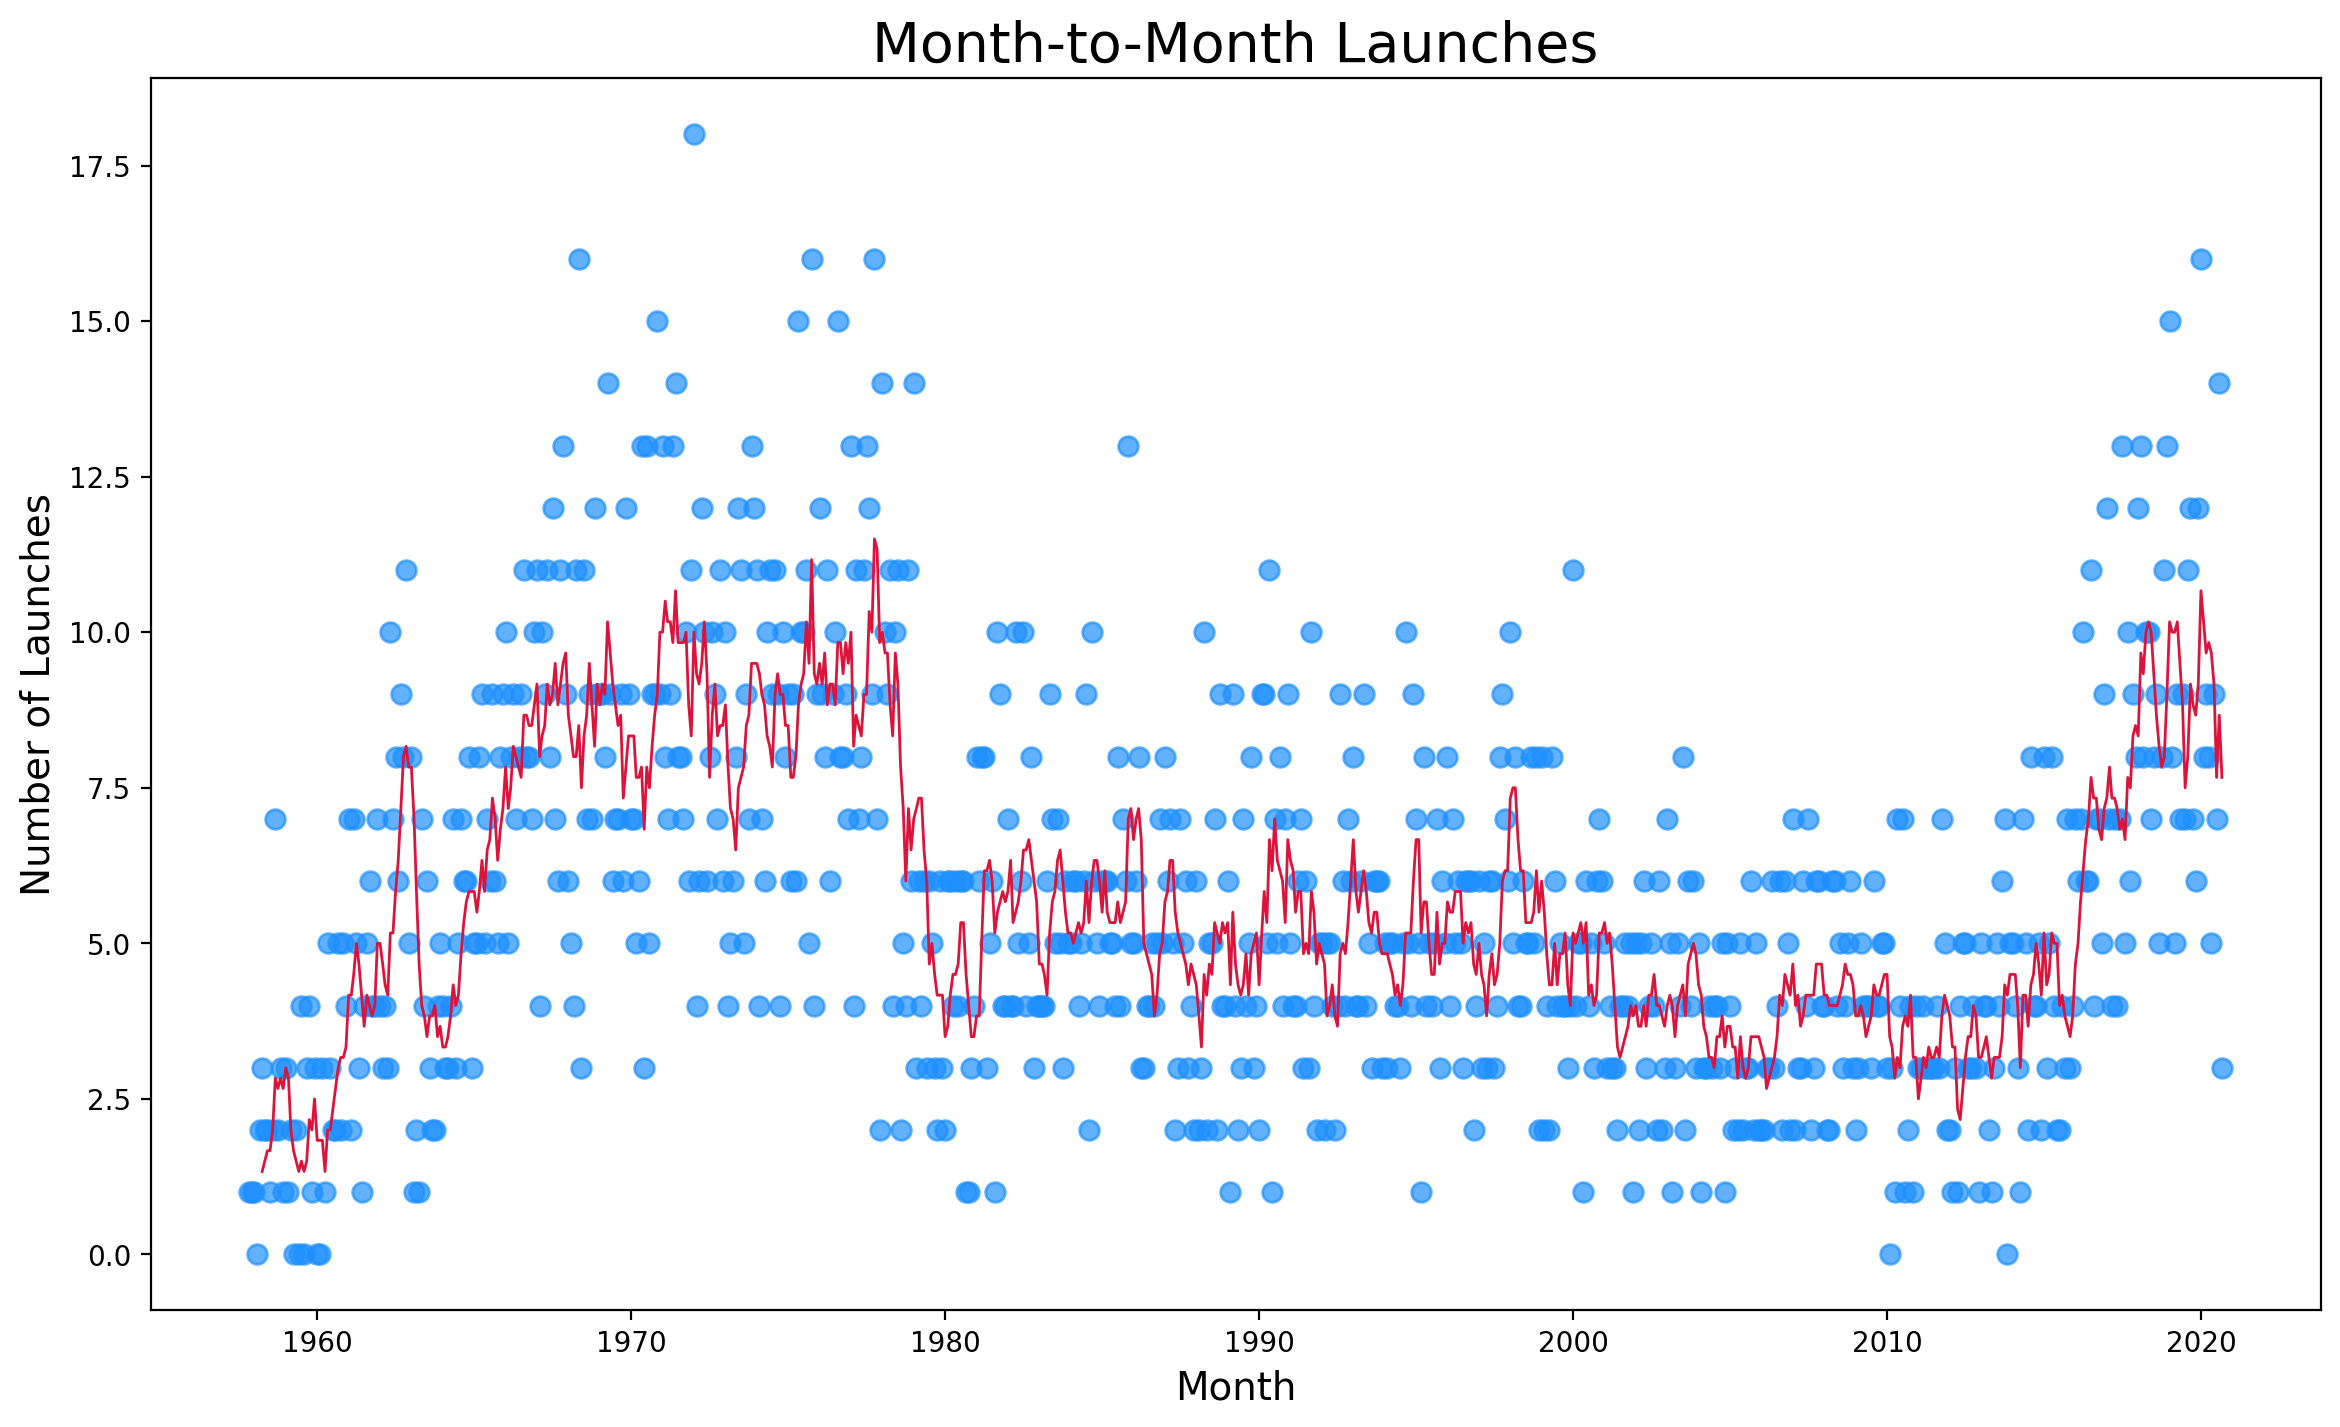

In [91]:
plt.figure(figsize=(14,8), dpi=200)
plt.title("Month-to-Month Launches", fontsize=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Launches", fontsize=14)
plt.scatter(launches_month.index,launches_month.Country, color="dodgerblue", alpha=0.7, s=50)
plt.plot(launches_month.index, rolling.Country, color="crimson", linewidth=1)
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [94]:
df_data["Month"] = df_data.DateTime.dt.month
popular_months = df_data.groupby("Month").agg({"Mission_Status": pd.Series.count})
popular_months

,Mission_Status
Month,
1,268
2,336
3,353
4,383
5,326
6,402
7,351
8,373
9,365


In [96]:
fig = px.bar(popular_months, popular_months.index, y="Mission_Status")
fig.show()

In [92]:
fig = px.line(launches_month, x=launches_month.index, y="Country")
fig.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [97]:
clean_data.Date = pd.to_datetime(clean_data.Date)

<ipython-input-97-7ee64e87ab29>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
clean_data.Date = clean_data.Date.astype("string")
clean_data["DateTime"] = clean_data.Date.str.split(" ").str[0]
clean_data.head(1)
clean_data.DateTime = pd.to_datetime(clean_data.DateTime)
clean_data.DateTime.info()

<class 'pandas.core.series.Series'>
Int64Index: 964 entries, 0 to 4020
Series name: DateTime
Non-Null Count  Dtype         
--------------  -----         
964 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.1 KB


<ipython-input-98-20913b3d5d6d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-98-20913b3d5d6d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-98-20913b3d5d6d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
launches_year = clean_data.groupby(clean_data.DateTime.dt.year).agg({"Price": pd.Series.mean})
launches_year

,Price
DateTime,
1964,63.23
1965,63.23
1966,59.00
1967,196.62
1968,279.20
1969,609.50
1970,"1,160.00"
1971,"1,160.00"
1972,"1,160.00"


In [100]:
plt.figure(dpi=200)
fig = px.line(launches_year, x=launches_year.index, y="Price", title="Average Cost per Year",
              labels={
                  "DateTime": "Year",
                  "Price": "Average Cost"
              })
fig.show()

<Figure size 1280x960 with 0 Axes>

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [101]:
df_data["Year"] = df_data.DateTime.dt.year
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,country_code,DateTime,Month,Year
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,United States of America,USA,2020-08-07,8,2020
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020-08-06,8,2020
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,United States of America,USA,2020-08-04,8,2020
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ,2020-07-30,7,2020
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,United States of America,USA,2020-07-30,7,2020


In [102]:
top_ten_org = df_data.groupby("Organisation").agg({"Country": pd.Series.count})
top_ten_org.sort_values("Country", ascending=False, inplace=True)
top_ten_org = top_ten_org[:10]
top_ten_org

,Country
Organisation,
RVSN USSR,1777
Arianespace,279
General Dynamics,251
CASC,251
NASA,203
VKS RF,201
US Air Force,161
ULA,140
Boeing,136


In [103]:
org_launches = df_data.groupby(["Year", "Organisation"]).agg({"Country": pd.Series.count})
org_launches
org_launches = org_launches.query("Organisation in @top_ten_org.index")
org_launches = org_launches.reset_index()

In [104]:
plt.figure(figsize=(14,8), dpi=200)
fig = px.line(org_launches, x="Year", y="Country",
              labels={
                  "Year": "Year",
                  "Country": "Launches"
              },
              color="Organisation")
fig.show()

<Figure size 2800x1600 with 0 Axes>

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [106]:
launches_country = df_data[df_data.Year <= 1991].groupby("Country", as_index=False).Mission_Status.count()
launches_country
launches_country["Country"] = launches_country.Country.astype("string")
launches_country["Country"] = launches_country["Country"].str.replace("Kazakhstan","Russian Federation")
launches_country = launches_country.groupby("Country").sum().reset_index()
launches_country.sort_values("Mission_Status", ascending=False, inplace=True)
launches_country


,Country,Mission_Status
7,Russian Federation,1770
8,United States of America,662
2,France,61
5,Japan,52
1,China,38
6,Kenya,9
3,India,7
0,Australia,6
4,Israel,2


In [107]:
# launches_country = df_data.groupby("Country").agg({"Mission_Status": pd.Series.count})
# launches_country.reset_index(inplace=True)
# launches_country["Country"] = launches_country.Country.astype("string")
# launches_country["Country"] = launches_country["Country"].str.replace("Kazakhstan","Russian Federation")
# launches_country = launches_country.groupby("Country").sum().reset_index()
# launches_country.sort_values("Mission_Status", ascending=False, inplace=True)
# launches_country


In [108]:
fig = px.pie(launches_country, values="Mission_Status", names="Country")
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [112]:
year_superpowers = df_data[df_data.Year <= 1991].groupby(["Year", "Country"], as_index=False).Mission_Status.count()
year_superpowers
year_superpowers["Country"] = year_superpowers.Country.astype("string")
year_superpowers["Country"] = year_superpowers["Country"].str.replace("Kazakhstan","Russian Federation")
year_superpowers = year_superpowers.groupby(["Year","Country"]).sum().reset_index()
year_superpowers


,Year,Country,Mission_Status
0,1957,Russian Federation,2
1,1957,United States of America,1
2,1958,Russian Federation,5
3,1958,United States of America,23
4,1959,Russian Federation,4
...,...,...,...
151,1991,China,1
152,1991,France,8
153,1991,Japan,3
154,1991,Russian Federation,29


In [114]:
us_ussr = launches_country[:2]
us_ussr

,Country,Mission_Status
7,Russian Federation,1770
8,United States of America,662


In [115]:
year_superpowers = year_superpowers.query("Country in @us_ussr.Country")
year_superpowers

,Year,Country,Mission_Status
0,1957,Russian Federation,2
1,1957,United States of America,1
2,1958,Russian Federation,5
3,1958,United States of America,23
4,1959,Russian Federation,4
...,...,...,...
144,1989,United States of America,16
149,1990,Russian Federation,37
150,1990,United States of America,26
154,1991,Russian Federation,29


In [117]:
fig = px.line(year_superpowers, x="Year", y="Mission_Status", color="Country",
              labels={
                  "Mission_Status": "Launches"
              })
fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [122]:
year_failures = df_data[df_data.Mission_Status != "Success"].groupby(["Year", "Country"], as_index=False).Mission_Status.count()
year_failures

,Year,Country,Mission_Status
0,1957,United States of America,1
1,1958,Kazakhstan,4
2,1958,United States of America,18
3,1959,Kazakhstan,2
4,1959,United States of America,10
...,...,...,...
199,2019,United States of America,3
200,2020,China,3
201,2020,"Iran, Islamic Republic of",1
202,2020,New Zealand,1


In [123]:
fig = px.line(year_failures, x="Year", y="Mission_Status", color="Country",
              labels={
                  "Mission_Status": "Failures"
              })
fig.show()

In [124]:
year_failures = year_failures.query("Country in @us_ussr.Country")
year_failures

,Year,Country,Mission_Status
0,1957,United States of America,1
2,1958,United States of America,18
4,1959,United States of America,10
6,1960,United States of America,14
8,1961,Russian Federation,2
...,...,...,...
184,2016,United States of America,1
191,2017,Russian Federation,1
195,2018,United States of America,1
199,2019,United States of America,3


In [125]:
fig = px.line(year_failures, x="Year", y="Mission_Status", color="Country",
              labels={
                  "Mission_Status": "Failures"
              })
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [129]:
df = pd.merge(year_superpowers.reset_index(), year_failures.reset_index(), how="inner", on=["Year", "Country"])
df

,index_x,Year,Country,Mission_Status_x,index_y,Mission_Status_y
0,1,1957,United States of America,1,0,1
1,3,1958,United States of America,23,2,18
2,5,1959,United States of America,16,4,10
3,7,1960,United States of America,30,6,14
4,8,1961,Russian Federation,9,8,2
5,9,1961,United States of America,43,9,16
6,10,1962,Russian Federation,22,11,1
7,11,1962,United States of America,60,12,10
8,12,1963,Russian Federation,24,14,4
9,13,1963,United States of America,17,15,4


In [130]:
df["Percent Failures"] = (df.Mission_Status_y/df.Mission_Status_x)*100
df.head()

,index_x,Year,Country,Mission_Status_x,index_y,Mission_Status_y,Percent Failures
0,1,1957,United States of America,1,0,1,100.00
1,3,1958,United States of America,23,2,18,78.26
2,5,1959,United States of America,16,4,10,62.50
3,7,1960,United States of America,30,6,14,46.67
4,8,1961,Russian Federation,9,8,2,22.22


In [131]:
fig = px.line(df, x="Year", y="Percent Failures", color="Country")
fig.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [134]:
launches_country = df_data.groupby(["Year","Country"], as_index=False).agg({"Mission_Status": pd.Series.count})
launches_country

,Year,Country,Mission_Status
0,1957,Kazakhstan,2
1,1957,United States of America,1
2,1958,Kazakhstan,5
3,1958,United States of America,23
4,1959,Kazakhstan,4
...,...,...,...
422,2020,Japan,3
423,2020,Kazakhstan,6
424,2020,New Zealand,3
425,2020,Russian Federation,3


In [136]:
fig = px.line(launches_country, x="Year", y="Mission_Status", color="Country",
              labels={
                  "Mission_Status": "Launches"
              })
fig.show()

In [135]:
successful_launches = df_data[df_data.Mission_Status == "Success"].groupby(["Year", "Country"], as_index=False).Mission_Status.count()
successful_launches


,Year,Country,Mission_Status
0,1957,Kazakhstan,2
1,1958,Kazakhstan,1
2,1958,United States of America,5
3,1959,Kazakhstan,2
4,1959,United States of America,6
...,...,...,...
381,2020,Japan,3
382,2020,Kazakhstan,6
383,2020,New Zealand,2
384,2020,Russian Federation,3


In [138]:
fig = px.line(successful_launches, x="Year", y="Mission_Status", color="Country",
              labels={
                  "Mission_Status": "Successful Launches"
              })
fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [139]:
launches_org = df_data.groupby(["Year","Organisation"], as_index=False).agg({"Mission_Status": pd.Series.count})
launches_org

,Year,Organisation,Mission_Status
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,AMBA,7
3,1958,NASA,2
4,1958,RVSN USSR,5
...,...,...,...
658,2020,Roscosmos,4
659,2020,SpaceX,14
660,2020,ULA,4
661,2020,VKS RF,3


In [141]:
fig = px.line(launches_org, x="Year", y="Mission_Status", color="Organisation",
              labels={
                  "Mission_Status": "Launches"
              })
fig.show()